<a href="https://colab.research.google.com/github/AsifSyeed/Rainfall-Prediction-with-Artificial-Neural-Network-with-Bangladeshi-Rainfall-Dataset/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BRACU/Thesis/Code for new dataset/csv/dataset_raw_final.csv')
dataset = df.values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15828 entries, 0 to 15827
Data columns (total 34 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Station  15828 non-null  object
 1   Year     15828 non-null  int64 
 2   Month    15828 non-null  int64 
 3   1        15828 non-null  object
 4   2        15828 non-null  object
 5   3        15828 non-null  object
 6   4        15828 non-null  object
 7   5        15828 non-null  object
 8   6        15828 non-null  object
 9   7        15828 non-null  object
 10  8        15828 non-null  object
 11  9        15828 non-null  object
 12  10       15828 non-null  object
 13  11       15828 non-null  object
 14  12       15828 non-null  object
 15  13       15828 non-null  object
 16  14       15828 non-null  object
 17  15       15828 non-null  object
 18  16       15828 non-null  object
 19  17       15828 non-null  object
 20  18       15828 non-null  object
 21  19       15828 non-null  object
 22

In [ ]:
df.head()

,Station,Year,Month,1,2,3,4,5,6,7,...,22,23,24,25,26,27,28,29,30,31
0,Dhaka,1980,1,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Dhaka,1980,2,0,0,0,0,14,1,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,Dhaka,1980,3,30,7,0,1,0,0,0,...,0,0,0,0,11,3,0,0,1,1
3,Dhaka,1980,4,0,0,0,1,0,1,0,...,0,1,0,0,0,4,0,11,2,NaN
4,Dhaka,1980,5,1,0,11,0,21,60,2,...,0,0,0,0,19,1,32,39,2,21


In [ ]:
df.describe

<bound method NDFrame.describe of          Station  Year  Month   1  2   3   4   5   6  7  ...   23   24   25  \
0          Dhaka  1980      1   0  0   3   0   0   0  0  ...    0    0    0   
1          Dhaka  1980      2   0  0   0   0  14   1  0  ...    0    0    0   
2          Dhaka  1980      3  30  7   0   1   0   0  0  ...    0    0    0   
3          Dhaka  1980      4   0  0   0   1   0   1  0  ...    1    0    0   
4          Dhaka  1980      5   1  0  11   0  21  60  2  ...    0    0    0   
...          ...   ...    ...  .. ..  ..  ..  ..  .. ..  ...  ...  ...  ...   
15823  Sitakunda  2020      8   0  2   3   8  14   0  9  ...   65    6   29   
15824  Sitakunda  2020      9   0  1   0   0   0   0  3  ...   43   28  164   
15825  Sitakunda  2020     10   0  0   0  22  21   4  0  ...  108  101    0   
15826  Sitakunda  2020     11  30  4   1  18   1   0  0  ...    0    0    0   
15827  Sitakunda  2020     12   0  0   0   0   0   0  0  ...    0    0    0   

       26  27  28

In [ ]:
df = df.replace(to_replace = np.nan, value = 0)

In [ ]:
df = df.replace(to_replace = "***", value = 0) 

In [ ]:
df.dtypes

Station    object
Year        int64
Month       int64
1          object
2          object
3          object
4          object
5          object
6          object
7          object
8          object
9          object
10         object
11         object
12         object
13         object
14         object
15         object
16         object
17         object
18         object
19         object
20         object
21         object
22         object
23         object
24         object
25         object
26         object
27         object
28         object
29         object
30         object
31         object
dtype: object

In [ ]:
convert_dict = {'1': int,
                '2': int,
                '3': int,
                '4': int,
                '5': int,
                '6': int,
                '7': int,
                '8': int,
                '9': int,
                '10': int,
                '11': int,
                '12': int,
                '13': int,
                '14': int,
                '15': int,
                '16': int,
                '17': int,
                '18': int,
                '19': int,
                '20': int,
                '21': int,
                '22': int,
                '23': int,
                '24': int,
                '25': int,
                '26': int,
                '27': int,
                '28': int,
                '29': int,
                '30': int,
                '31': int
               }
  
df = df.astype(convert_dict)

In [ ]:
df.dtypes

Station    object
Year        int64
Month       int64
1           int64
2           int64
3           int64
4           int64
5           int64
6           int64
7           int64
8           int64
9           int64
10          int64
11          int64
12          int64
13          int64
14          int64
15          int64
16          int64
17          int64
18          int64
19          int64
20          int64
21          int64
22          int64
23          int64
24          int64
25          int64
26          int64
27          int64
28          int64
29          int64
30          int64
31          int64
dtype: object

In [ ]:
sum_column = df["1"] + df["2"] + df["3"] + df["4"] + df["5"] + df["6"] + df["7"] + df["8"] + df["9"] + df["10"] + df["11"] + df["12"] + df["13"] + df["14"] + df["15"] + df["16"] + df["17"] + df["18"] + df["19"] + df["20"] + df["21"] + df["22"] + df["23"] + df["24"] + df["25"] + df["26"] + df["27"] + df["28"] + df["29"] + df["30"] + df["31"]
df["Monthly"] = sum_column

In [ ]:
df = df.drop(["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31"], axis=1)

In [ ]:
df_t = df.drop(["Month", "Monthly"], axis=1)

In [ ]:
jan=[]
feb=[]
march=[]
april=[]
may=[]
june=[]
july=[]
aug=[]
sept=[]
oct=[]
nov=[]
dec=[]


for index, row in df.iterrows():
  if row['Month'] == 1:
    jan.append(row['Monthly'])
  if row['Month'] == 2:
    feb.append(row['Monthly'])
  if row['Month'] == 3:
    march.append(row['Monthly'])
  if row['Month'] == 4:
    april.append(row['Monthly'])
  if row['Month'] == 5:
    may.append(row['Monthly'])
  if row['Month'] == 6:
    june.append(row['Monthly'])
  if row['Month'] == 7:
    july.append(row['Monthly'])
  if row['Month'] == 8:
    aug.append(row['Monthly'])
  if row['Month'] == 9:
    sept.append(row['Monthly'])
  if row['Month'] == 10:
    oct.append(row['Monthly'])
  if row['Month'] == 11:
    nov.append(row['Monthly'])
  if row['Month'] == 12:
    dec.append(row['Monthly'])

In [ ]:
last = july[-1]
june.append(last)

In [ ]:
del july[-1]

In [ ]:
df_t = df_t.drop_duplicates(subset=['Station', 'Year'], keep='first')

In [ ]:
df_t['Jan'] = jan
df_t['Feb'] = feb
df_t['Mar'] = march
df_t['Apr'] = april
df_t['May'] = may
df_t['Jun'] = june
df_t['Jul'] = july
df_t['Aug'] = aug
df_t['Sep'] = sept
df_t['Oct'] = oct
df_t['Nov'] = nov
df_t['Dec'] = dec

In [ ]:
sum = df_t["Jan"] + df_t["Feb"] + df_t["Mar"] + df_t["Apr"] + df_t["May"] + df_t["Jun"] + df_t["Jul"] + df_t["Aug"] + df_t["Sep"] + df_t["Oct"] + df_t["Nov"] + df_t["Dec"]
df_t["Annual"] = sum

In [ ]:
df_t.head()

NameError: ignored

In [ ]:
df_t.to_csv('/content/drive/MyDrive/BRACU/Thesis/Code for new dataset/monthly_rainfall.csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BRACU/Thesis/Code for new dataset/monthly_rainfall.csv')
dataset = df.values

In [ ]:
df.head()

,Station,Year,Month,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Monthly
0,Dhaka,1980,1,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,Dhaka,1980,2,0,0,0,0,14,1,0,...,0,0,0,0,0,0,0,0,0,32
2,Dhaka,1980,3,30,7,0,1,0,0,0,...,0,0,0,11,3,0,0,1,1,54
3,Dhaka,1980,4,0,0,0,1,0,1,0,...,1,0,0,0,4,0,11,2,0,147
4,Dhaka,1980,5,1,0,11,0,21,60,2,...,0,0,0,19,1,32,39,2,21,414


In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94c937bbd0>,
      dtype=object)

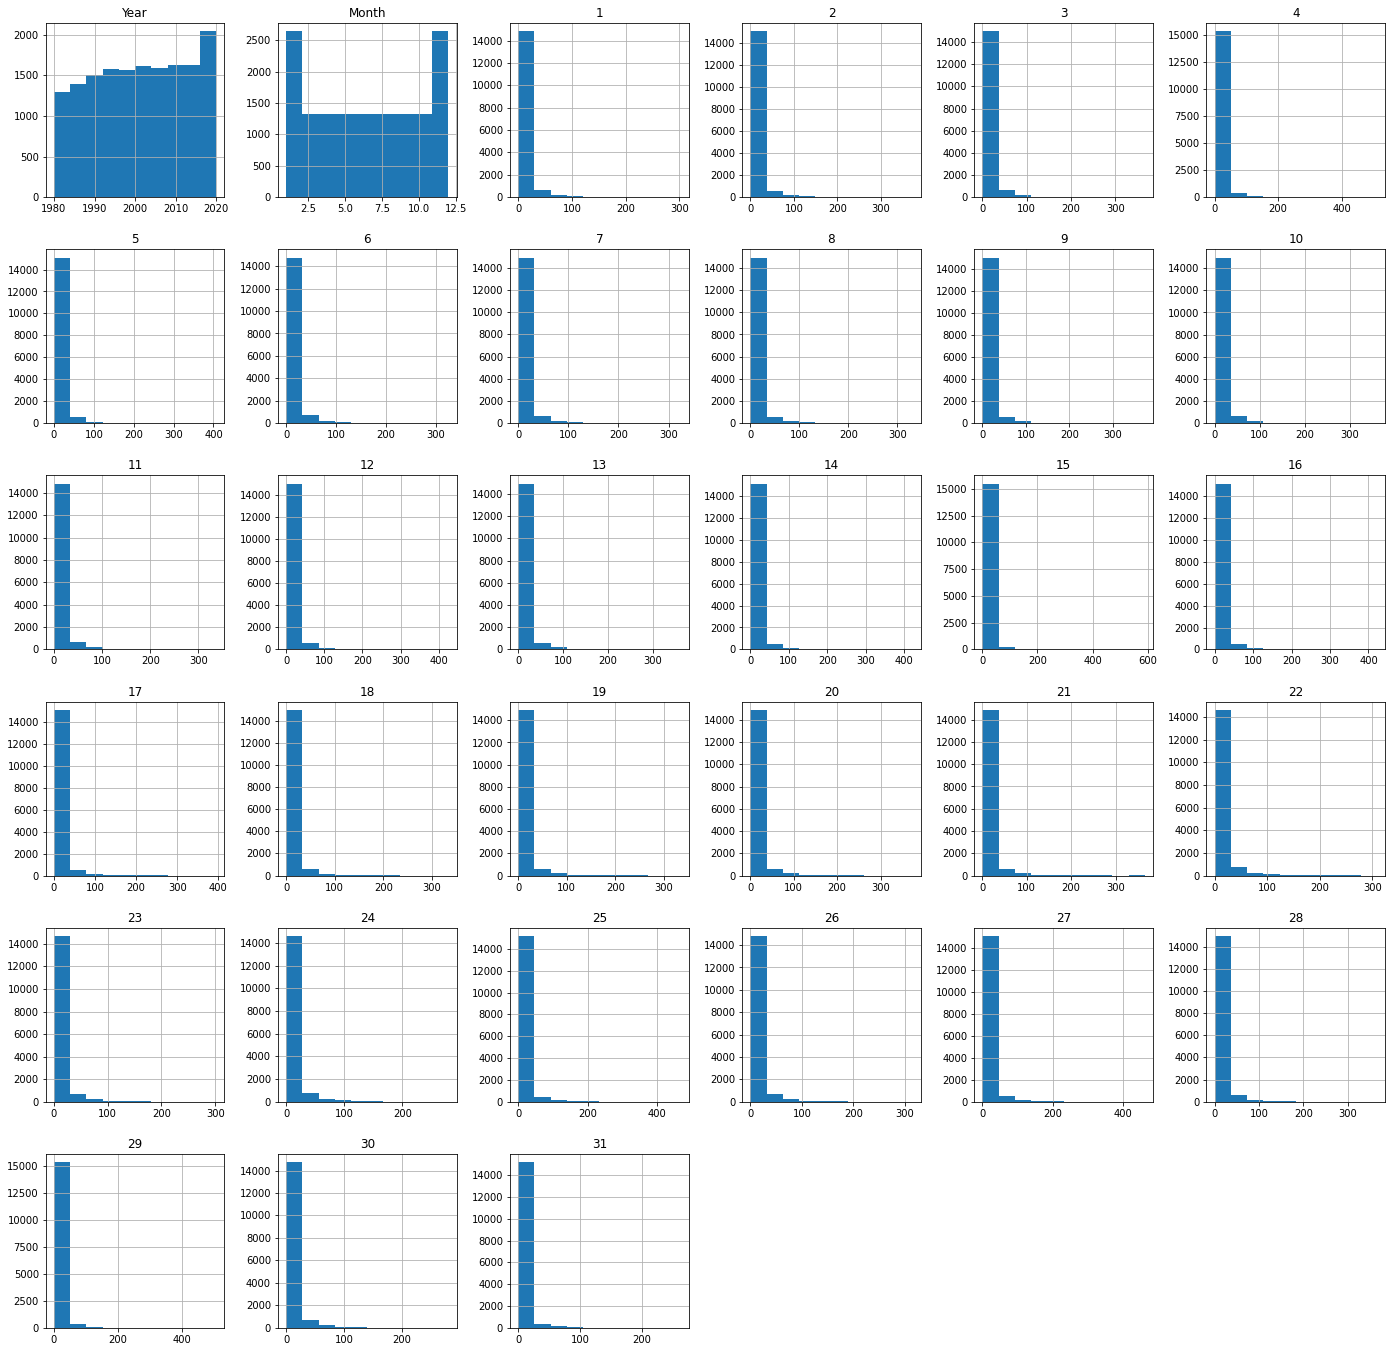

In [ ]:
df.hist(figsize=(24,24))

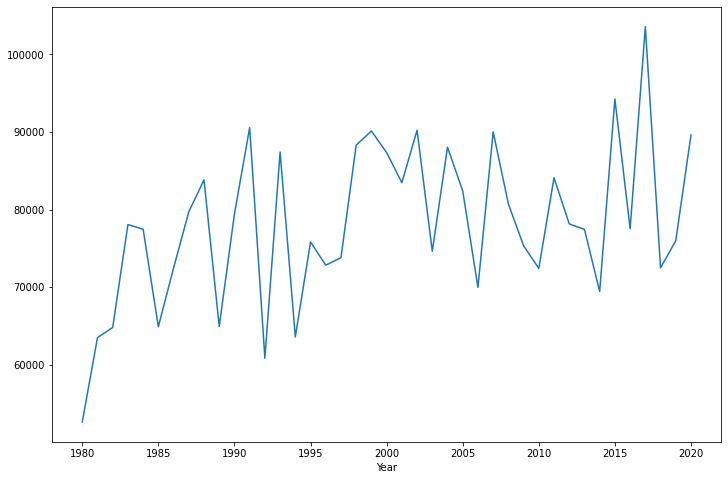

In [ ]:
df.groupby("Year").sum()['Monthly'].plot(figsize=(12,8))

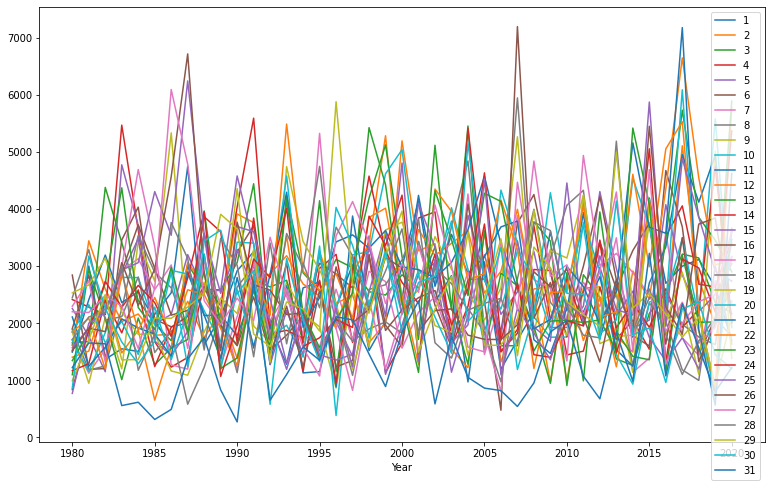

In [ ]:
df[['Year', "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31"]].groupby("Year").sum().plot(figsize=(13,8));

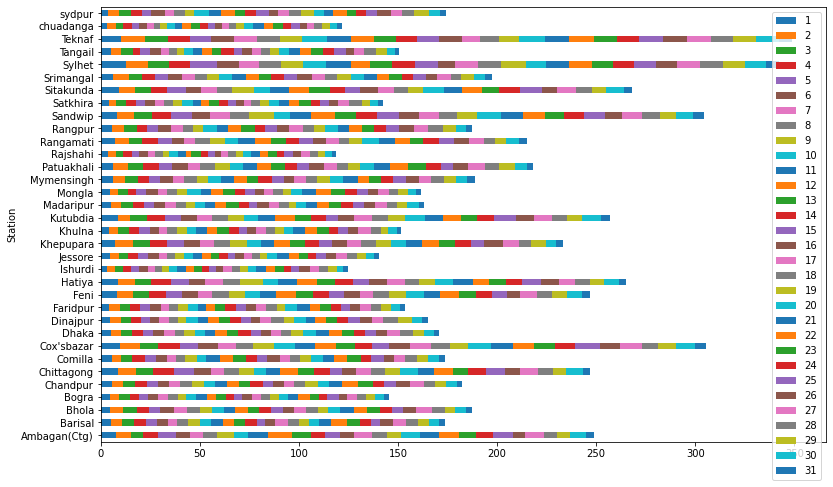

In [ ]:
df[['Station', "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31"]].groupby("Station").mean().plot.barh(stacked=True,figsize=(13,8));

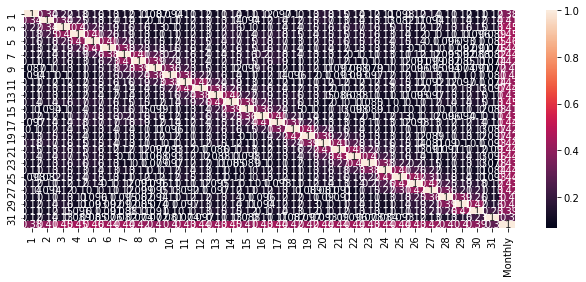

In [ ]:
plt.figure(figsize=(11,4))
sns.heatmap(df[["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31", "Monthly"]].corr(),annot=True)
plt.show()

In [ ]:
#Function to plot the graphs
def plot_graphs(groundtruth,prediction,title):        
    N = 9
    ind = np.arange(N)  # the x locations for the groups
    width = 0.2       # the width of the bars

    fig = plt.figure()
    fig.suptitle(title, fontsize=12)
    ax = fig.add_subplot(111)
    rects1 = ax.bar(ind, groundtruth, width, color='r')
    rects2 = ax.bar(ind+width, prediction, width, color='g')

    ax.set_ylabel("Amount of rainfall")
    ax.set_xticks(ind+width)
    ax.set_xticklabels( ("Monthly"))
    ax.legend( (rects1[0], rects2[0]), ('Ground truth', 'Prediction') )

#     autolabel(rects1)
    for rect in rects1:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')
    for rect in rects2:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')
#     autolabel(rects2)

    plt.show()

In [ ]:
# seperation of training and testing data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

division_data = np.asarray(df[["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31"]])

X = None; y = None
for i in range(division_data.shape[1]-3):
    if X is None:
        X = division_data[:, i:i+3]
        y = division_data[:, i+3]
    else:
        X = np.concatenate((X, division_data[:, i:i+3]), axis=0)
        y = np.concatenate((y, division_data[:, i+3]), axis=0)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
#test 2010
temp = df[['Station', "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31"]].loc[df['Year'] == 2010]

data_2010 = np.asarray(temp[["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31"]].loc[temp['Station'] == 'Sylhet'])

X_year_2010 = None; y_year_2010 = None
for i in range(data_2010.shape[1]-3):
    if X_year_2010 is None:
        X_year_2010 = data_2010[:, i:i+3]
        y_year_2010 = data_2010[:, i+3]
    else:
        X_year_2010 = np.concatenate((X_year_2010, data_2010[:, i:i+3]), axis=0)
        y_year_2010 = np.concatenate((y_year_2010, data_2010[:, i+3]), axis=0)

In [ ]:
#test 2005
temp = df[['Station', "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31"]].loc[df['Year'] == 2005]

data_2005 = np.asarray(temp[["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31"]].loc[temp['Station'] == 'Sylhet'])

X_year_2005 = None; y_year_2005 = None
for i in range(data_2005.shape[1]-3):
    if X_year_2005 is None:
        X_year_2005 = data_2005[:, i:i+3]
        y_year_2005 = data_2005[:, i+3]
    else:
        X_year_2005 = np.concatenate((X_year_2005, data_2005[:, i:i+3]), axis=0)
        y_year_2005 = np.concatenate((y_year_2005, data_2005[:, i+3]), axis=0)

In [ ]:
#test 2015
temp = df[['Station', "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31"]].loc[df['Year'] == 2015]

data_2015 = np.asarray(temp[["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31"]].loc[temp['Station'] == 'Sylhet'])


X_year_2015 = None; y_year_2015 = None
for i in range(data_2015.shape[1]-3):
    if X_year_2015 is None:
        X_year_2015 = data_2015[:, i:i+3]
        y_year_2015 = data_2015[:, i+3]
    else:
        X_year_2015 = np.concatenate((X_year_2015, data_2015[:, i:i+3]), axis=0)
        y_year_2015 = np.concatenate((y_year_2015, data_2015[:, i+3]), axis=0)

In [ ]:
from sklearn import linear_model

# linear model
reg = linear_model.ElasticNet(alpha=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print (mean_absolute_error(y_test, y_pred))

8.317548175156917


In [ ]:
#2005
y_year_pred_2005 = reg.predict(X_year_2005)


#2010
y_year_pred_2010 = reg.predict(X_year_2010)
    
y_year_pred_2015 = reg.predict(X_year_2015)

print ("MEAN 2005")
print (np.mean(y_year_2005),np.mean(y_year_pred_2005))
print ("Standard deviation 2005")
print (np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005)))


print ("MEAN 2010")
print (np.mean(y_year_2010),np.mean(y_year_pred_2010))
print ("Standard deviation 2010")
print (np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010)))


print ("MEAN 2015")
print (np.mean(y_year_2015),np.mean(y_year_pred_2015))
print ("Standard deviation 2015")
print (np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))


# plot_graphs(y_year_2005,y_year_pred_2005,"Year-2005")
# plot_graphs(y_year_2010,y_year_pred_2010,"Year-2010")
# plot_graphs(y_year_2015,y_year_pred_2015,"Year-2015")

MEAN 2005
11.779761904761905 9.069504481838505
Standard deviation 2005
23.653607797713914 9.612277419268114
MEAN 2010
13.339285714285714 9.82173390417193
Standard deviation 2010
26.77326099397869 10.38568460049885
MEAN 2015
11.544642857142858 8.842994656210005
Standard deviation 2015
23.99239278974089 9.459751774123076


In [ ]:
from sklearn.svm import SVR

# SVM model
clf = SVR(gamma='auto', C=0.1, epsilon=0.2)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
print (mean_absolute_error(y_test, y_pred))

In [ ]:
#2005
y_year_pred_2005 = reg.predict(X_year_2005)

#2010
y_year_pred_2010 = reg.predict(X_year_2010)
    
#2015
y_year_pred_2015 = reg.predict(X_year_2015)
print ("MEAN 2005")
print (np.mean(y_year_2005),np.mean(y_year_pred_2005))
print ("Standard deviation 2005")
print (np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005)))


print ("MEAN 2010")
print (np.mean(y_year_2010),np.mean(y_year_pred_2010))
print ("Standard deviation 2010")
print (np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010)))


print ("MEAN 2015")
print (np.mean(y_year_2015),np.mean(y_year_pred_2015))
print ("Standard deviation 2015")
print (np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))

# plot_graphs(y_year_2005,y_year_pred_2005,"Year-2005")
# plot_graphs(y_year_2010,y_year_pred_2010,"Year-2010")
# plot_graphs(y_year_2015,y_year_pred_2015,"Year-2015")

In [ ]:
from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(3,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3, 1)]            0         
                                                                 
 conv1d (Conv1D)             (None, 3, 64)             192       
                                                                 
 conv1d_1 (Conv1D)           (None, 3, 128)            16512     
                                                                 
 flatten (Flatten)           (None, 384)               0         
                                                                 
 dense (Dense)               (None, 128)               49280     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080  

In [ ]:
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=100, verbose=1, validation_split=0.1, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print (mean_absolute_error(y_test, y_pred))

Epoch 1/100
4675/4675 [==============================] - 23s 5ms/step - loss: 294.3483 - mae: 7.7612 - val_loss: 303.9858 - val_mae: 7.9208
Epoch 2/100
4675/4675 [==============================] - 19s 4ms/step - loss: 293.7773 - mae: 7.7564 - val_loss: 304.3454 - val_mae: 7.8141
Epoch 3/100
4675/4675 [==============================] - 19s 4ms/step - loss: 293.6205 - mae: 7.7544 - val_loss: 302.9682 - val_mae: 7.8457
Epoch 4/100
4675/4675 [==============================] - 19s 4ms/step - loss: 293.4106 - mae: 7.7505 - val_loss: 307.3100 - val_mae: 7.4942
Epoch 5/100
4675/4675 [==============================] - 19s 4ms/step - loss: 293.4971 - mae: 7.7531 - val_loss: 302.8393 - val_mae: 7.6953
Epoch 6/100
4675/4675 [==============================] - 19s 4ms/step - loss: 293.2847 - mae: 7.7503 - val_loss: 302.8179 - val_mae: 7.8466
Epoch 7/100
4675/4675 [==============================] - 20s 4ms/step - loss: 293.1292 - mae: 7.7458 - val_loss: 303.3596 - val_mae: 8.2202
Epoch 8/100
4675/467

In [ ]:
#2005
y_year_pred_2005 = reg.predict(X_year_2005)

#2010
y_year_pred_2010 = reg.predict(X_year_2010)
    
#2015
y_year_pred_2015 = reg.predict(X_year_2015)

print ("MEAN 2005")
print (np.mean(y_year_2005),np.mean(y_year_pred_2005))
print ("Standard deviation 2005")
print (np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005)))


print ("MEAN 2010")
print (np.mean(y_year_2010),np.mean(y_year_pred_2010))
print ("Standard deviation 2010")
print (np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010)))


print ("MEAN 2015")
print (np.mean(y_year_2015),np.mean(y_year_pred_2015))
print ("Standard deviation 2015")
print (np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))

# plot_graphs(y_year_2005,y_year_pred_2005,"Year-2005")
# plot_graphs(y_year_2010,y_year_pred_2010,"Year-2010")
# plot_graphs(y_year_2015,y_year_pred_2015,"Year-2015")

MEAN 2005
11.779761904761905 9.069504481838505
Standard deviation 2005
23.653607797713914 9.612277419268114
MEAN 2010
13.339285714285714 9.82173390417193
Standard deviation 2010
26.77326099397869 10.38568460049885
MEAN 2015
11.544642857142858 8.842994656210005
Standard deviation 2015
23.99239278974089 9.459751774123076
